# PCA (Core)
**Reducción de Dimensionalidad**

**Descripción:**

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



## Objetivo:

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.

In [1]:
# Agregar la carpeta 'src' al sys.path
import sys
import os

# Buscar 'src' automáticamente sin depender del nombre del proyecto
current_dir = os.getcwd()  # Directorio actual
while not os.path.exists(os.path.join(current_dir, "src")):
    current_dir = os.path.dirname(current_dir)  # Subir un nivel
    if current_dir == "/":  # Evitar bucles infinitos
        raise FileNotFoundError("No se encontró la carpeta 'src'. Verifica la estructura.")

src_path = os.path.join(current_dir, "src")
if src_path not in sys.path:
    sys.path.append(src_path)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from utils import cargar_datos_pd
from utils import dimensiones
from utils import ver_resumen_nulos
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import plot_varianza


# 1. Carga de datos

In [2]:
df = cargar_datos_pd(ruta_archivo='../../data/winequality-red.csv',sep=',', header=0)

Dataset cargado con éxito.


El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

In [3]:
dimensiones(df)

Dimensiones del dataset:
Features: 12, Ejemplos: 1599
Primeras 5 filas del dataset:


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 2. Exploración y preprocesamiento de datos:
- Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.


In [5]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1599,0,0.0
volatile acidity,1599,0,0.0
citric acid,1599,0,0.0
residual sugar,1599,0,0.0
chlorides,1599,0,0.0
free sulfur dioxide,1599,0,0.0
total sulfur dioxide,1599,0,0.0
density,1599,0,0.0
pH,1599,0,0.0
sulphates,1599,0,0.0


No hay valores nulos.

In [6]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 240


In [7]:
# Eliminar duplicados
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


### Verificación y ajuste de tipos de datos

No se requiere, pues todos vienen ya convertidos a los tipos correctos

### **Corrección de inconsistencias en valores categóricos**

#### Identificación de valores fuera de rango

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


#### Análisis donde cuento cuántos valores de rango tengo en cero

In [10]:
df.loc[df['citric acid']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,118.0,7.037288,0.919383,4.90000,6.50000,7.100000,7.600000,9.10000
volatile acidity,118.0,0.701737,0.178047,0.34000,0.60000,0.675000,0.773750,1.58000
citric acid,118.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000
residual sugar,118.0,2.222881,0.744657,1.20000,1.80000,2.100000,2.400000,5.60000
chlorides,118.0,0.083373,0.030400,0.04100,0.06700,0.080000,0.093000,0.26700
free sulfur dioxide,118.0,14.932203,10.415085,3.00000,7.00000,13.000000,19.000000,51.00000
total sulfur dioxide,118.0,31.173729,18.607206,8.00000,14.25000,28.000000,42.750000,88.00000
density,118.0,0.995912,0.001910,0.99154,0.99477,0.996195,0.997152,1.00025
pH,118.0,3.456695,0.137884,3.18000,3.36000,3.450000,3.520000,4.01000
sulphates,118.0,0.600678,0.111859,0.37000,0.53000,0.580000,0.650000,0.96000


El critic acid es normal que sea cero ...

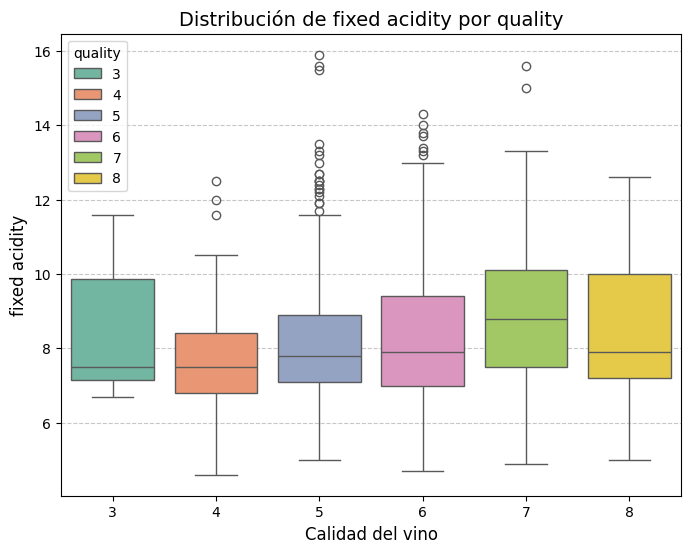

----------------------------------------------------------------------------------------------------
Descripcion de fixed acidity por quality
quality          3          4           5           6           7          8
count    10.000000  53.000000  577.000000  535.000000  167.000000  17.000000
mean      8.360000   7.779245    8.171231    8.337383    8.858683   8.441176
std       1.770875   1.626624    1.550584    1.811032    1.973537   2.114846
min       6.700000   4.600000    5.000000    4.700000    4.900000   5.000000
25%       7.150000   6.800000    7.100000    7.000000    7.500000   7.200000
50%       7.500000   7.500000    7.800000    7.900000    8.800000   7.900000
75%       9.875000   8.400000    8.900000    9.400000   10.100000  10.000000
max      11.600000  12.500000   15.900000   14.300000   15.600000  12.600000
Límite inferior (bigote inferior): 3.95
Límite superior (bigote superior): 12.349999999999998
-----------------------------------------------------------------------

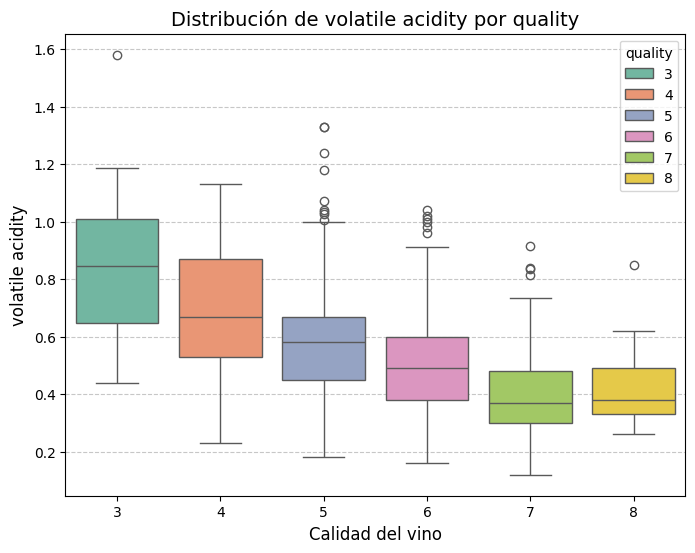

----------------------------------------------------------------------------------------------------
Descripcion de volatile acidity por quality
quality          3          4           5           6           7          8
count    10.000000  53.000000  577.000000  535.000000  167.000000  17.000000
mean      0.884500   0.693962    0.578596    0.496084    0.403653   0.427647
std       0.331256   0.220110    0.170017    0.162925    0.141162   0.148178
min       0.440000   0.230000    0.180000    0.160000    0.120000   0.260000
25%       0.647500   0.530000    0.450000    0.380000    0.300000   0.330000
50%       0.845000   0.670000    0.580000    0.490000    0.370000   0.380000
75%       1.010000   0.870000    0.670000    0.600000    0.480000   0.490000
max       1.580000   1.130000    1.330000    1.040000    0.915000   0.850000
Límite inferior (bigote inferior): 0.015000000000000013
Límite superior (bigote superior): 1.0150000000000001
----------------------------------------------------

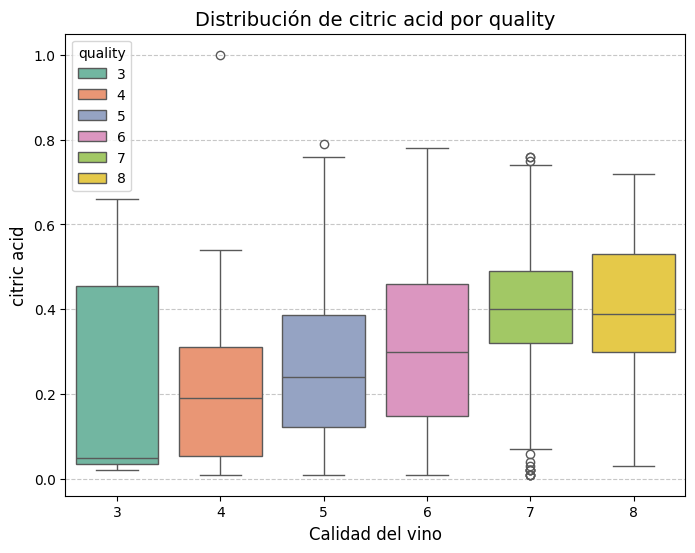

----------------------------------------------------------------------------------------------------
Descripcion de citric acid por quality
quality         3          4           5           6           7          8
count    7.000000  43.000000  526.000000  488.000000  160.000000  17.000000
mean     0.244286   0.214651    0.268232    0.306270    0.388125   0.382941
std      0.270854   0.202818    0.172177    0.184305    0.180283   0.202539
min      0.020000   0.010000    0.010000    0.010000    0.010000   0.030000
25%      0.035000   0.055000    0.122500    0.147500    0.320000   0.300000
50%      0.050000   0.190000    0.240000    0.300000    0.400000   0.390000
75%      0.455000   0.310000    0.387500    0.460000    0.490000   0.530000
max      0.660000   1.000000    0.790000    0.780000    0.760000   0.720000
Límite inferior (bigote inferior): -0.30999999999999994
Límite superior (bigote superior): 0.8899999999999999
------------------------------------------------------------------

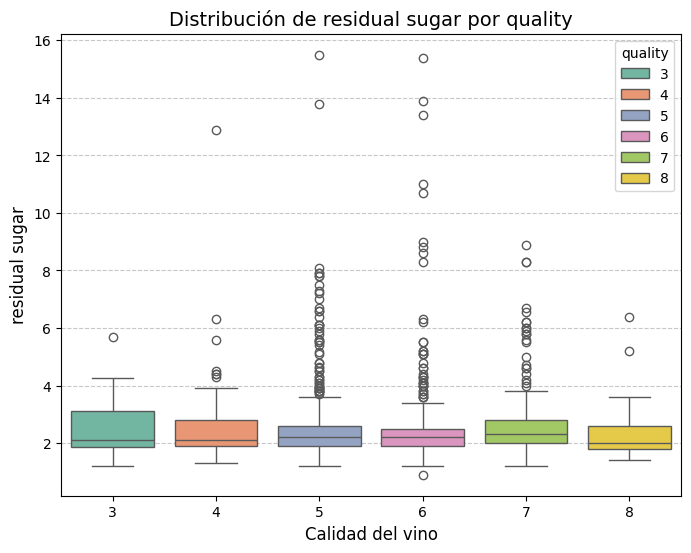

----------------------------------------------------------------------------------------------------
Descripcion de residual sugar por quality
quality          3          4           5           6           7          8
count    10.000000  53.000000  577.000000  535.000000  167.000000  17.000000
mean      2.635000   2.694340    2.509532    2.457290    2.716766   2.576471
std       1.401596   1.789436    1.291547    1.356053    1.383091   1.334883
min       1.200000   1.300000    1.200000    0.900000    1.200000   1.400000
25%       1.875000   1.900000    1.900000    1.900000    2.000000   1.800000
50%       2.100000   2.100000    2.200000    2.200000    2.300000   2.000000
75%       3.100000   2.800000    2.600000    2.500000    2.800000   2.600000
max       5.700000  12.900000   15.500000   15.400000    8.900000   6.400000
Límite inferior (bigote inferior): 0.8499999999999996
Límite superior (bigote superior): 3.6500000000000004
--------------------------------------------------------

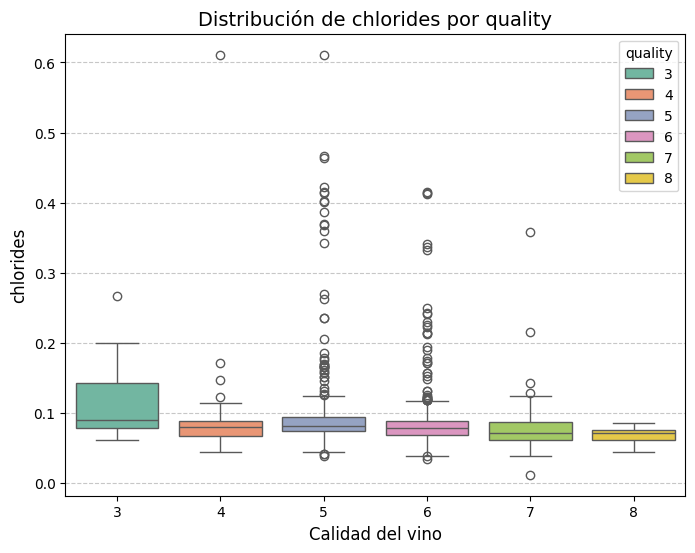

----------------------------------------------------------------------------------------------------
Descripcion de chlorides por quality
quality          3          4           5           6           7          8
count    10.000000  53.000000  577.000000  535.000000  167.000000  17.000000
mean      0.122500   0.090679    0.093971    0.085075    0.076832   0.068353
std       0.066241   0.076192    0.056027    0.041783    0.031251   0.012031
min       0.061000   0.045000    0.039000    0.034000    0.012000   0.044000
25%       0.079000   0.067000    0.074000    0.068000    0.062000   0.061000
50%       0.090500   0.080000    0.082000    0.078000    0.072000   0.071000
75%       0.143000   0.089000    0.094000    0.088000    0.087000   0.076000
max       0.267000   0.610000    0.611000    0.415000    0.358000   0.086000
Límite inferior (bigote inferior): 0.03850000000000002
Límite superior (bigote superior): 0.12249999999999998
-----------------------------------------------------------

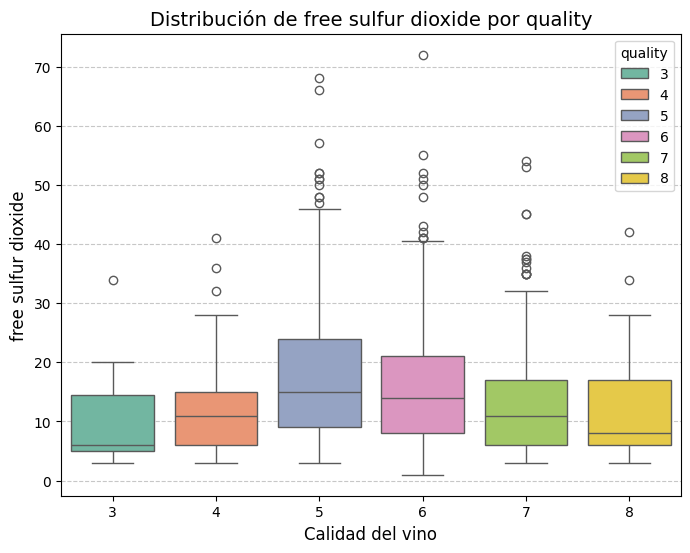

----------------------------------------------------------------------------------------------------
Descripcion de free sulfur dioxide por quality
quality          3          4           5           6           7          8
count    10.000000  53.000000  577.000000  535.000000  167.000000  17.000000
mean     11.000000  12.264151   17.161179   15.637383   13.994012  13.764706
std       9.763879   9.025926   10.944939    9.886069   10.212352  11.300052
min       3.000000   3.000000    3.000000    1.000000    3.000000   3.000000
25%       5.000000   6.000000    9.000000    8.000000    6.000000   6.000000
50%       6.000000  11.000000   15.000000   14.000000   11.000000   8.000000
75%      14.500000  15.000000   24.000000   21.000000   17.000000  17.000000
max      34.000000  41.000000   68.000000   72.000000   54.000000  42.000000
Límite inferior (bigote inferior): -14.0
Límite superior (bigote superior): 42.0
------------------------------------------------------------------------------

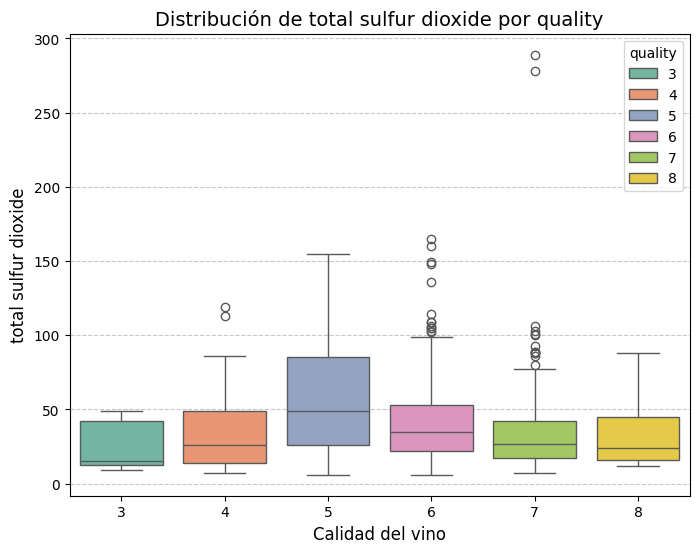

----------------------------------------------------------------------------------------------------
Descripcion de total sulfur dioxide por quality
quality          3           4           5           6           7          8
count    10.000000   53.000000  577.000000  535.000000  167.000000  17.000000
mean     24.900000   36.245283   57.406412   40.816822   35.449102  34.470588
std      16.828877   27.583374   37.302558   25.165893   35.090702  25.829048
min       9.000000    7.000000    6.000000    6.000000    7.000000  12.000000
25%      12.500000   14.000000   26.000000   22.000000   17.000000  16.000000
50%      15.000000   26.000000   49.000000   35.000000   27.000000  24.000000
75%      42.500000   49.000000   85.000000   53.000000   42.000000  45.000000
max      49.000000  119.000000  155.000000  165.000000  289.000000  88.000000
Límite inferior (bigote inferior): -39.5
Límite superior (bigote superior): 124.5
-------------------------------------------------------------------

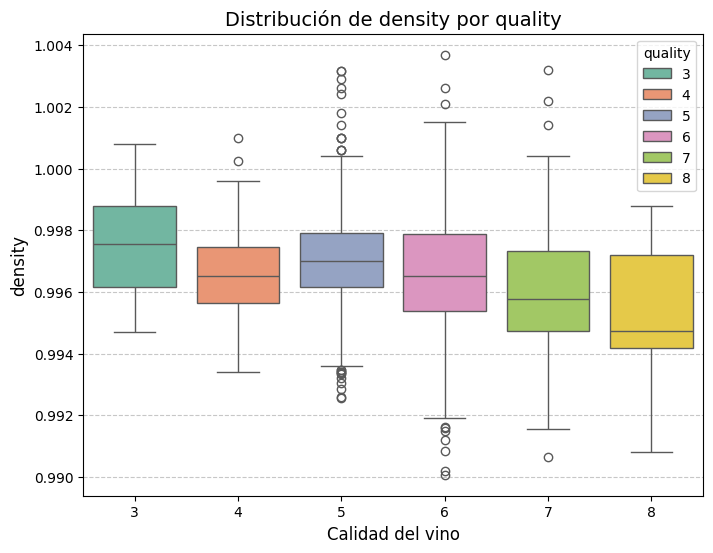

----------------------------------------------------------------------------------------------------
Descripcion de density por quality
quality          3          4           5           6           7          8
count    10.000000  53.000000  577.000000  535.000000  167.000000  17.000000
mean      0.997464   0.996542    0.997082    0.996565    0.996051   0.995095
std       0.002002   0.001575    0.001584    0.001968    0.002136   0.002398
min       0.994710   0.993400    0.992560    0.990070    0.990640   0.990800
25%       0.996150   0.995650    0.996160    0.995390    0.994720   0.994170
50%       0.997565   0.996500    0.997000    0.996520    0.995770   0.994720
75%       0.998770   0.997450    0.997900    0.997865    0.997335   0.997200
max       1.000800   1.001000    1.003150    1.003690    1.003200   0.998800
Límite inferior (bigote inferior): 0.99227
Límite superior (bigote superior): 1.00115
-------------------------------------------------------------------------------------

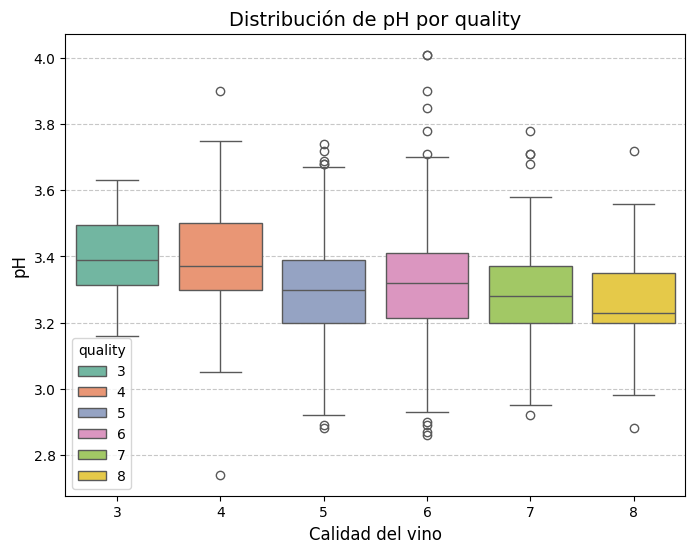

----------------------------------------------------------------------------------------------------
Descripcion de pH por quality
quality          3          4           5           6           7          8
count    10.000000  53.000000  577.000000  535.000000  167.000000  17.000000
mean      3.398000   3.381509    3.300815    3.318000    3.290060   3.274118
std       0.144052   0.181441    0.149991    0.155413    0.149233   0.204605
min       3.160000   2.740000    2.880000    2.860000    2.920000   2.880000
25%       3.312500   3.300000    3.200000    3.215000    3.200000   3.200000
50%       3.390000   3.370000    3.300000    3.320000    3.280000   3.230000
75%       3.495000   3.500000    3.390000    3.410000    3.370000   3.350000
max       3.630000   3.900000    3.740000    4.010000    3.780000   3.720000
Límite inferior (bigote inferior): 2.925
Límite superior (bigote superior): 3.6849999999999996
---------------------------------------------------------------------------------

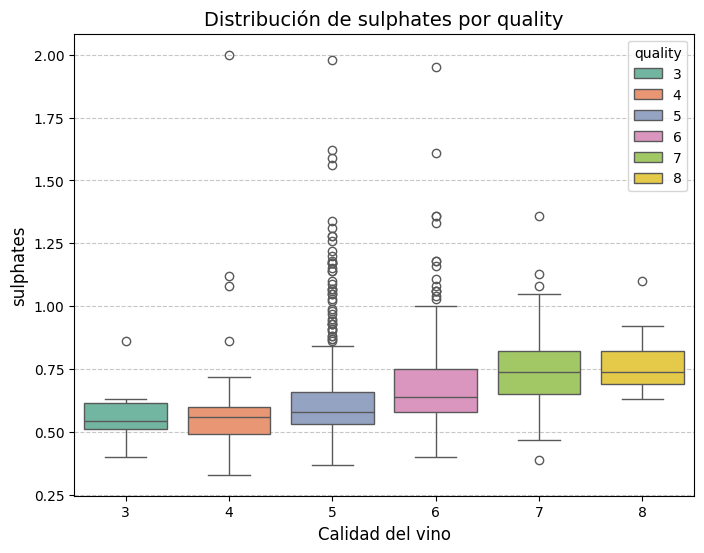

----------------------------------------------------------------------------------------------------
Descripcion de sulphates por quality
quality         3          4           5           6           7          8
count    10.00000  53.000000  577.000000  535.000000  167.000000  17.000000
mean      0.57000   0.596415    0.623570    0.674542    0.742635   0.774706
std       0.12202   0.239391    0.175856    0.154975    0.135656   0.115006
min       0.40000   0.330000    0.370000    0.400000    0.390000   0.630000
25%       0.51250   0.490000    0.530000    0.580000    0.650000   0.690000
50%       0.54500   0.560000    0.580000    0.640000    0.740000   0.740000
75%       0.61500   0.600000    0.660000    0.750000    0.820000   0.820000
max       0.86000   2.000000    1.980000    1.950000    1.360000   1.100000
Límite inferior (bigote inferior): 0.28000000000000014
Límite superior (bigote superior): 0.9999999999999999
---------------------------------------------------------------------

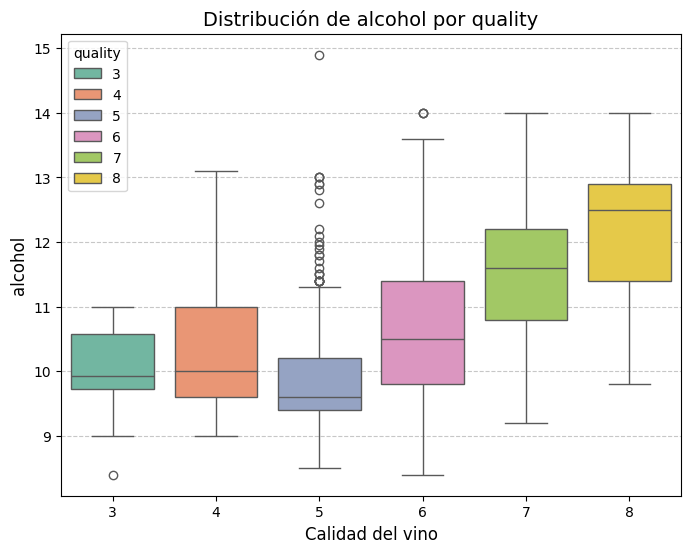

----------------------------------------------------------------------------------------------------
Descripcion de alcohol por quality
quality          3          4           5           6           7          8
count    10.000000  53.000000  577.000000  535.000000  167.000000  17.000000
mean      9.955000  10.265094    9.888562   10.658879   11.491118  12.158824
std       0.818009   0.934776    0.749930    1.054933    0.970779   1.229867
min       8.400000   9.000000    8.500000    8.400000    9.200000   9.800000
25%       9.725000   9.600000    9.400000    9.800000   10.800000  11.400000
50%       9.925000  10.000000    9.600000   10.500000   11.600000  12.500000
75%      10.575000  11.000000   10.200000   11.400000   12.200000  12.900000
max      11.000000  13.100000   14.900000   14.000000   14.000000  14.000000
Límite inferior (bigote inferior): 7.1000000000000005
Límite superior (bigote superior): 13.5
-----------------------------------------------------------------------------

In [11]:
# Iterar sobre todas las columnas del DataFrame
for columna in df.columns:
    if columna!='quality':
        aux = df.loc[df[columna]>0]
        # Crear el boxplot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='quality', y=columna, hue='quality', data=aux, palette='Set2')

        # Personalizar el gráfico
        plt.title(f'Distribución de {columna} por quality', fontsize=14)
        plt.xlabel('Calidad del vino', fontsize=12)
        plt.ylabel(columna, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
        print('-'*100)
        print(f'Descripcion de {columna} por quality')
        print(aux.groupby(by='quality')[columna].describe().T)
        imprimir_bigotes(aux[columna])    
        print('-'*100)
print('-'*47,'FIN','-'*48)
print('-'*100,'\n')

- Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

In [12]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


Vamos a escalar los datos para tener media 0 y desviación estándar 1.
Porque veo que hay características que afectaran la varianza: La covarianza estará dominada por las características superiores intrudiendo sesgo en los componentes principales.

In [13]:
# Escalar los datos para tener media 0 y desviación estándar 1
X = df.drop(columns=['quality'])
y = df['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar un resumen de los datos escalados
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)[:5]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_scaled.std(axis=0)[:5]}")

Resumen de datos escalados:
Media por característica (aproximadamente 0): [-6.27410804e-16  1.46395854e-16  2.09136935e-17 -1.20253737e-16
  1.88223241e-16]
Desviación estándar por característica (aproximadamente 1): [1. 1. 1. 1. 1.]


# 3. Aplicación de PCA:

- Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.

In [22]:
# Paso 2: Aplicar PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)# Aplicar PCA al dataset escalado
X_pca = pca.transform(X_scaled)

# Paso 3: Determinar cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Encontrar el número de componentes necesarios para capturar el 90% de la varianza
num_components = (cumulative_variance >= 0.90).argmax() + 1  # +1 porque los índices son base 0

# Mostrar el número de componentes y la varianza acumulada
print(f"Se necesitan {num_components} componentes para capturar al menos el 90% de la variabilidad.")
print(f"Varianza acumulada: {cumulative_variance[num_components - 1]:.4f}")


Se necesitan 7 componentes para capturar al menos el 90% de la variabilidad.
Varianza acumulada: 0.9094


- Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

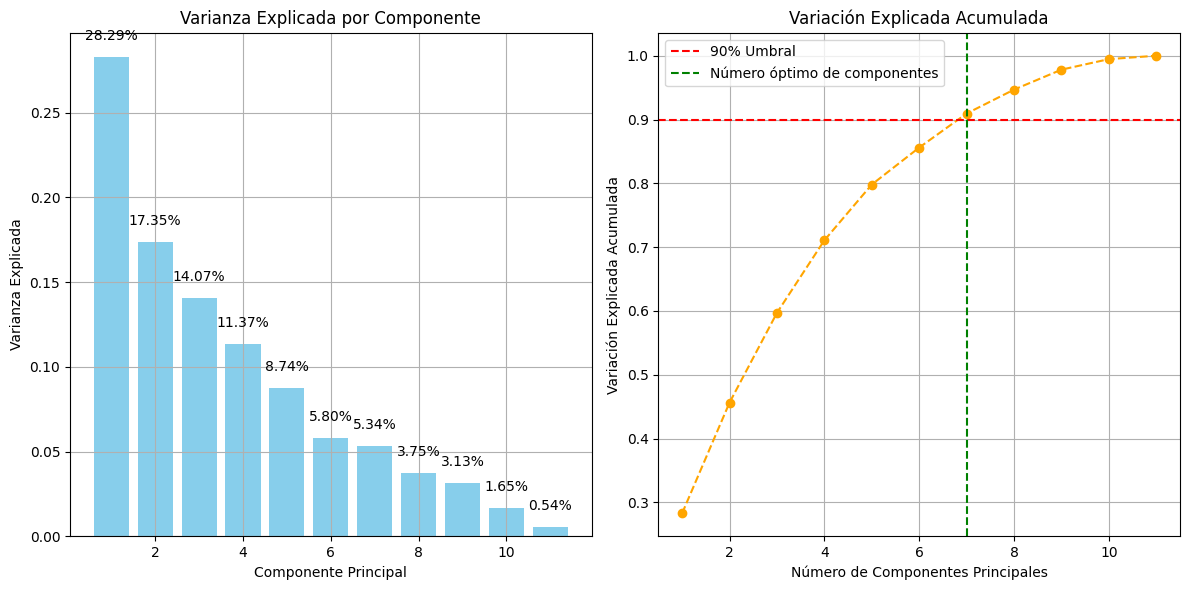

Variación explicada acumulada:
Componente 1: 28.29%
Componente 2: 45.64%
Componente 3: 59.71%
Componente 4: 71.08%
Componente 5: 79.81%
Componente 6: 85.61%
Componente 7: 90.94%
Componente 8: 94.69%
Componente 9: 97.82%
Componente 10: 99.46%
Componente 11: 100.00%


In [15]:
plot_varianza(pca)

# 4. Interpretación de los componentes principales:
  – Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.

In [16]:
varianzas = pca.explained_variance_
media_varianzas = np.mean(varianzas)
desviacion_varianzas = np.std(varianzas)
cv_pca = (desviacion_varianzas / media_varianzas) * 100
cv_pca

np.float64(86.78440669732667)

Paso 1: Obtener los coeficientes del PCA
Los coeficientes de cada variable en cada componente están disponibles en el atributo components_ del objeto PCA. Puedes organizarlos en un DataFrame para facilitar la interpretación.

In [17]:
# Crear un DataFrame con los coeficientes
componentes_df = pd.DataFrame(
    data=np.abs(pca.components_),  # Usamos el valor absoluto para interpretar magnitudes
    columns=X.columns,            # Nombres de las variables originales
    index=[f'PC{i+1}' for i in range(pca.n_components_)]  # Nombres de los componentes principales
)

# Mostrar los primeros componentes principales
print(componentes_df)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1        0.485314          0.239395     0.462539        0.134402   0.214132   
PC2        0.111220          0.276474     0.155371        0.237869   0.130783   
PC3        0.128634          0.443882     0.236545        0.114266   0.092317   
PC4        0.235668          0.072777     0.074551        0.405160   0.653842   
PC5        0.087802          0.251819     0.054695        0.738541   0.285699   
PC6        0.107940          0.419938     0.071963        0.012261   0.276412   
PC7        0.361534          0.520927     0.097930        0.300662   0.358134   
PC8        0.162757          0.064335     0.386750        0.264735   0.378456   
PC9        0.179061          0.135696     0.394514        0.041748   0.133745   
PC10       0.239221          0.360832     0.608867        0.099787   0.223664   
PC11       0.643559          0.006870     0.081910        0.174263   0.059848   

      free sulfur dioxide  

Paso 2: Identificar las variables más influyentes
Para cada componente principal, puedes identificar las variables con los coeficientes más altos (aquellas que tienen mayor impacto).

In [18]:
# Ordenar las variables más influyentes por componente principal
for pc in componentes_df.index:
    print(f"\nVariables más influyentes en {pc}:")
    print(componentes_df.loc[pc].sort_values(ascending=False).head(5))


Variables más influyentes en PC1:
fixed acidity    0.485314
citric acid      0.462539
pH               0.444253
density          0.391745
sulphates        0.250491
Name: PC1, dtype: float64

Variables más influyentes en PC2:
total sulfur dioxide    0.576338
free sulfur dioxide     0.512461
alcohol                 0.402980
volatile acidity        0.276474
residual sugar          0.237869
Name: PC2, dtype: float64

Variables más influyentes en PC3:
alcohol                 0.465276
volatile acidity        0.443882
free sulfur dioxide     0.436809
density                 0.349774
total sulfur dioxide    0.327314
Name: PC3, dtype: float64

Variables más influyentes en PC4:
chlorides         0.653842
sulphates         0.540297
residual sugar    0.405160
fixed acidity     0.235668
density           0.179819
Name: PC4, dtype: float64

Variables más influyentes en PC5:
residual sugar      0.738541
alcohol             0.335015
chlorides           0.285699
volatile acidity    0.251819
sulphates 

Paso 3: Visualizar las influencias
Puedes usar un gráfico de barras para mostrar qué variables tienen mayor impacto en cada componente.

In [ ]:
for pc in componentes_df.index:
    # Graficar las variables más influyentes del primer componente
    plt.figure(figsize=(10, 6))
    componentes_df.loc[pc].sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
    plt.title(f'Variables más influyentes en el {pc}')
    plt.xlabel('Variables')
    plt.ylabel('Contribución')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()   

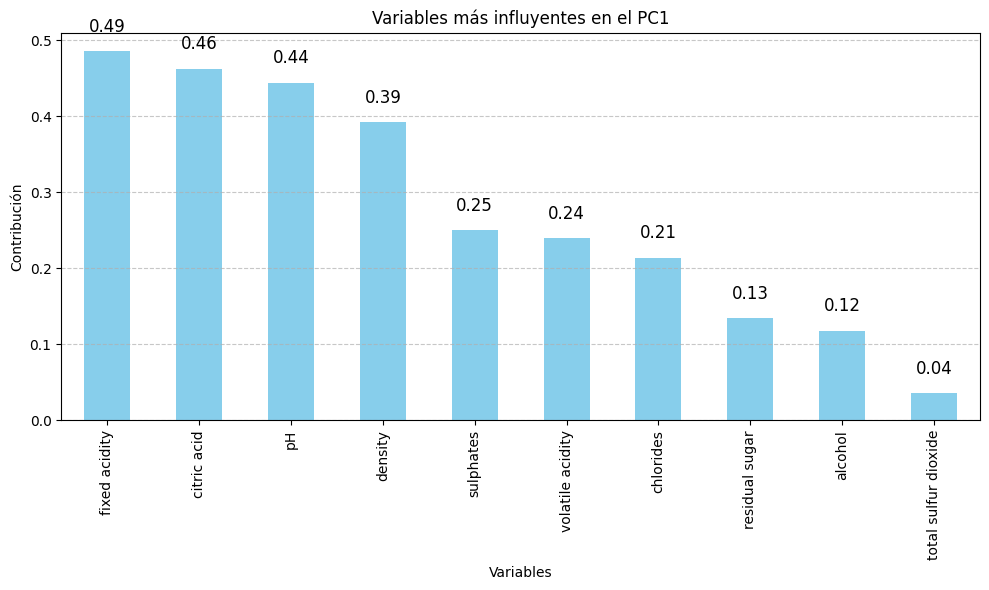

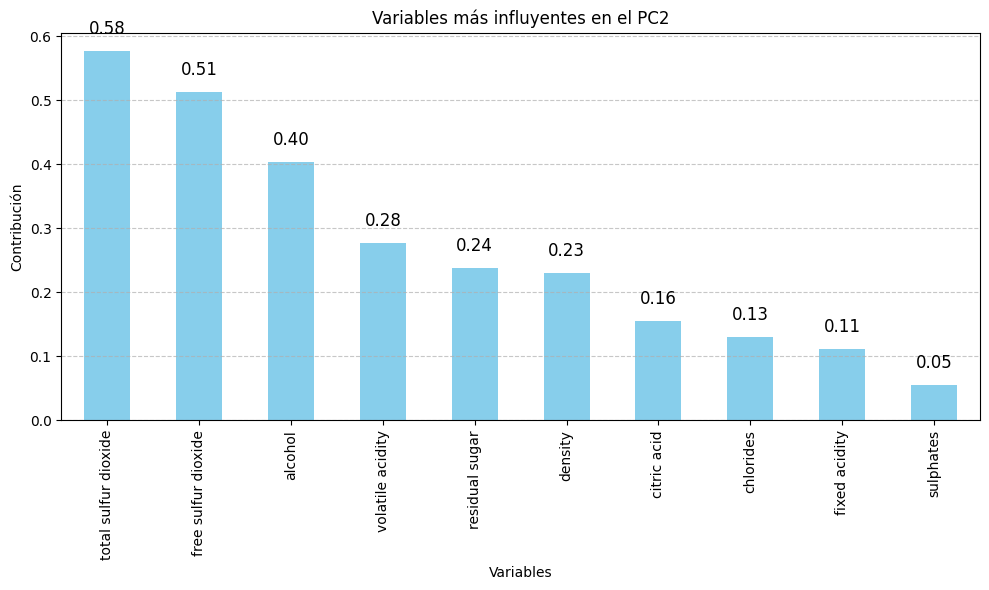

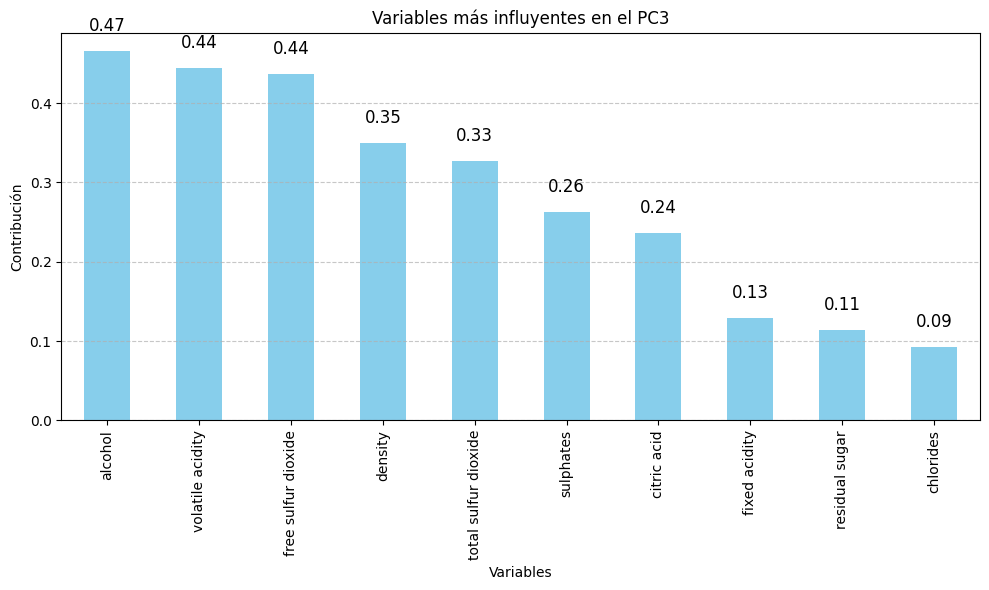

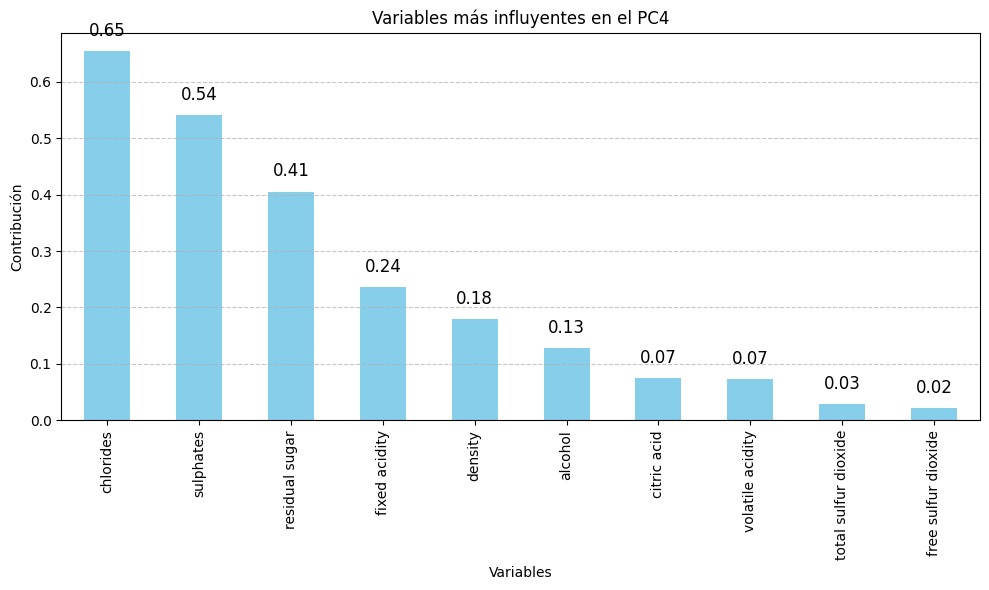

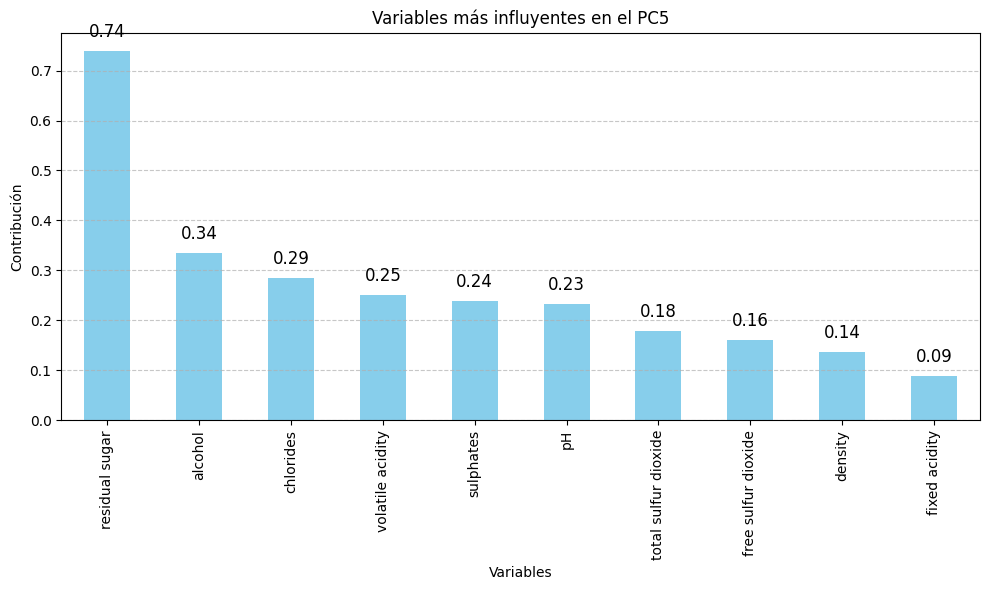

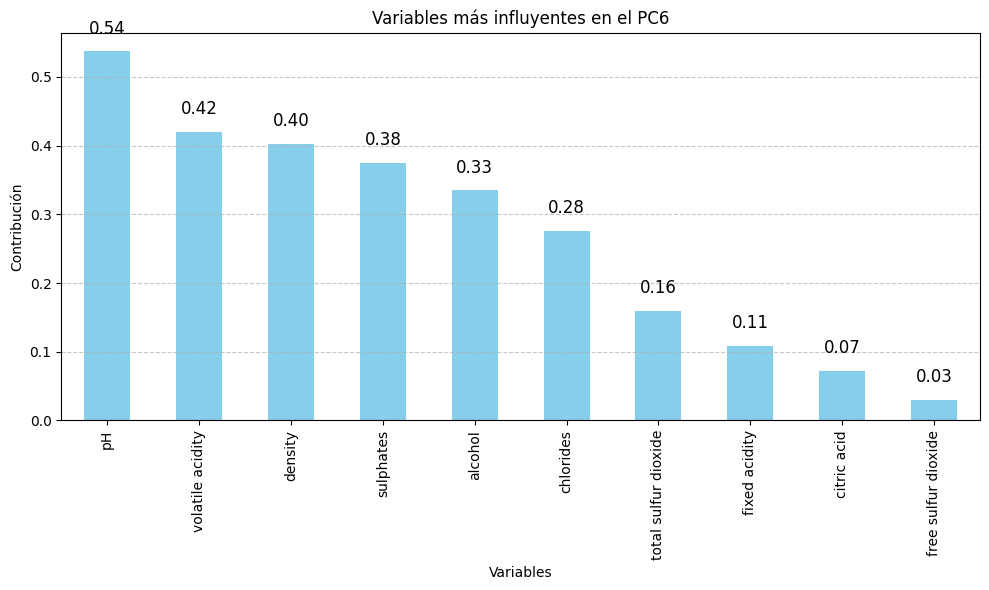

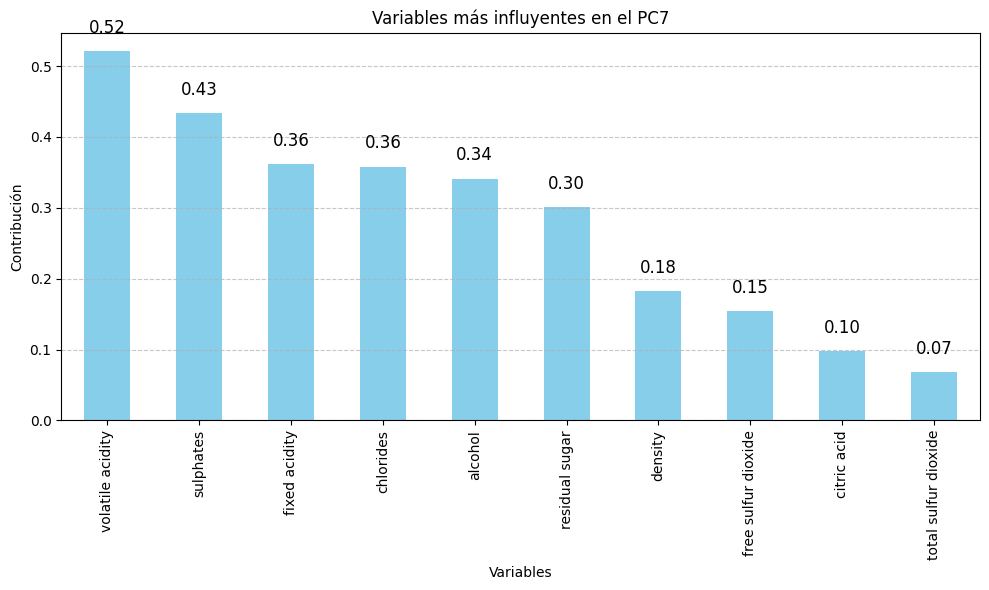

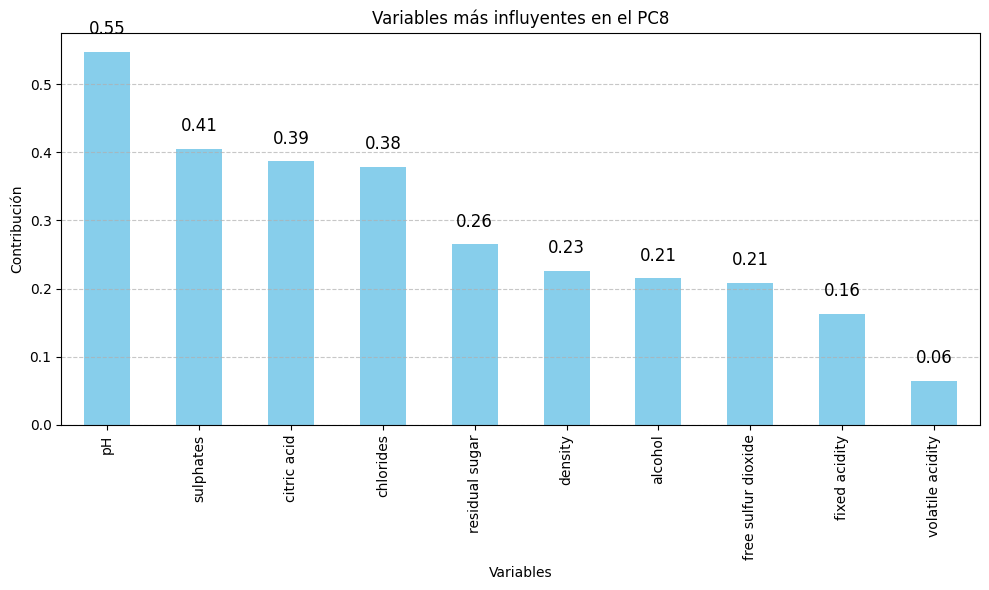

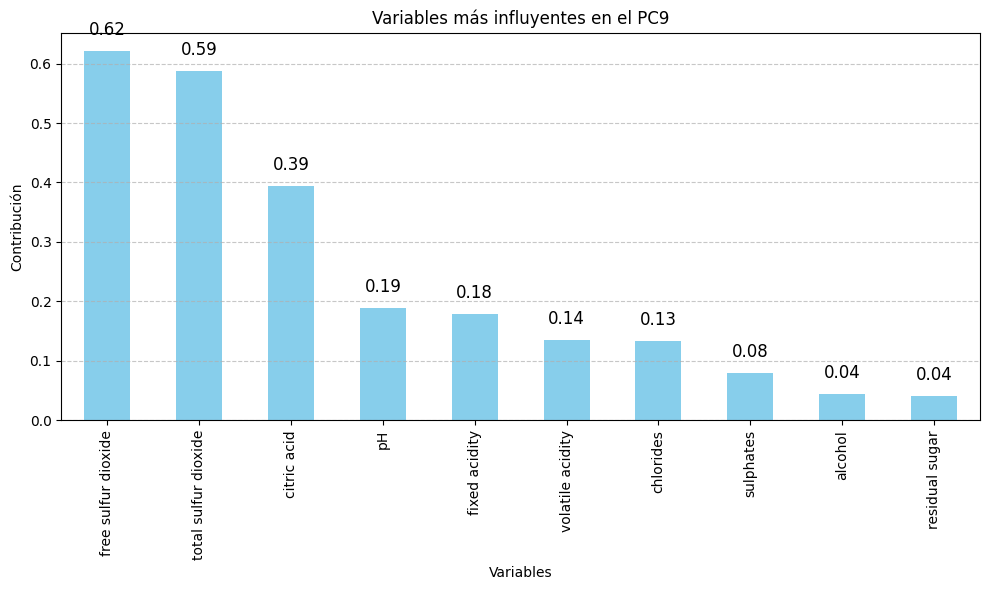

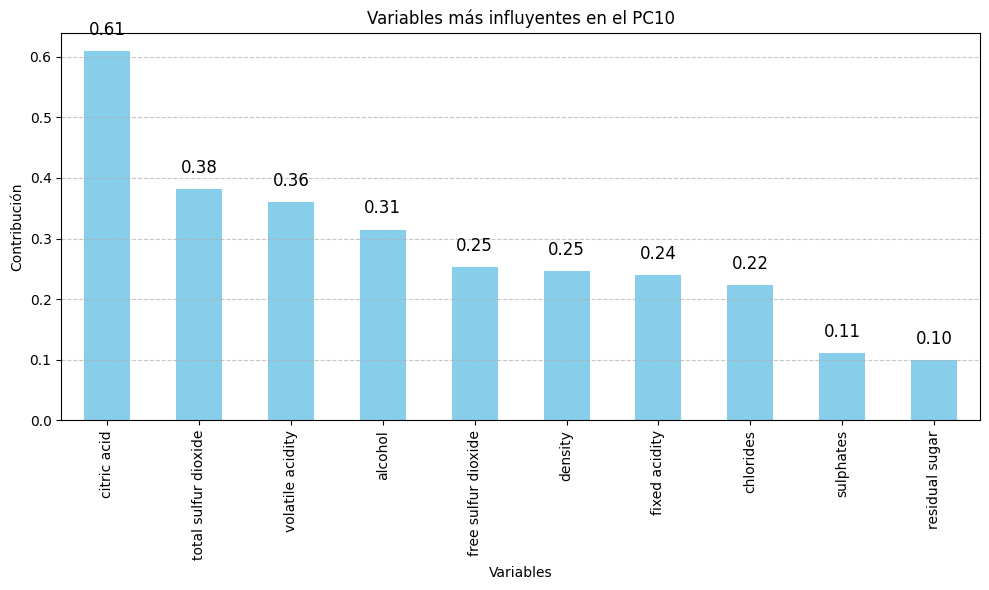

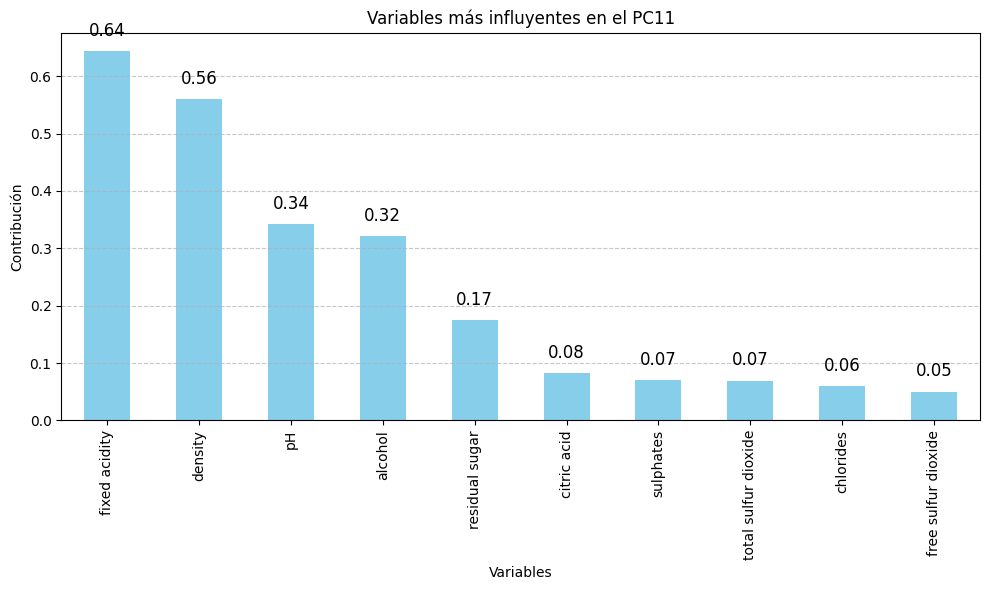

In [25]:
for pc in componentes_df.index:
    # Graficar las variables más influyentes del componente principal
    plt.figure(figsize=(10, 6))
    sorted_coefficients = componentes_df.loc[pc].sort_values(ascending=False).head(10)
    ax = sorted_coefficients.plot(kind='bar', color='skyblue')
    
    # Agregar los coeficientes sobre las barras
    for i, v in enumerate(sorted_coefficients):
        ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=12)  # Ajusta el valor de 0.02 si es necesario para separar el texto

    # Personalizar el gráfico
    plt.title(f'Variables más influyentes en el {pc}')
    plt.xlabel('Variables')
    plt.ylabel('Contribución')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### - Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

La PCA es una técnica que simplifica los conjuntos de datos complejos reduciendo sus dimensiones SIN perdida de información.
Al reducir dimensiones se puede prescindir: 
- Componentes que no aportan información útil.
- Componentes que intruducen ruído o redundancia: elimina la redundancia al agrupar la variabilidad de las variables correlacionadas en un solo componente. Este componente es reducido y tiene toda la info.
- Al reducir la correlación entre las características (las variables originales), el modelo puede enfocarse en las características más relevantes, lo que puede mejorar la precisión y la estabilidad del modelo.
- Facilita la visualización y el análisis de datos.
- Al reducir el espacio de los datos mejora el rendimiento de los modelos de Machine Learning AL REDUCIR riesgo sobre ajuste
y disminuir tiempo de entrenamiento.

# 5. Visualización y comparación:
- Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
- Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

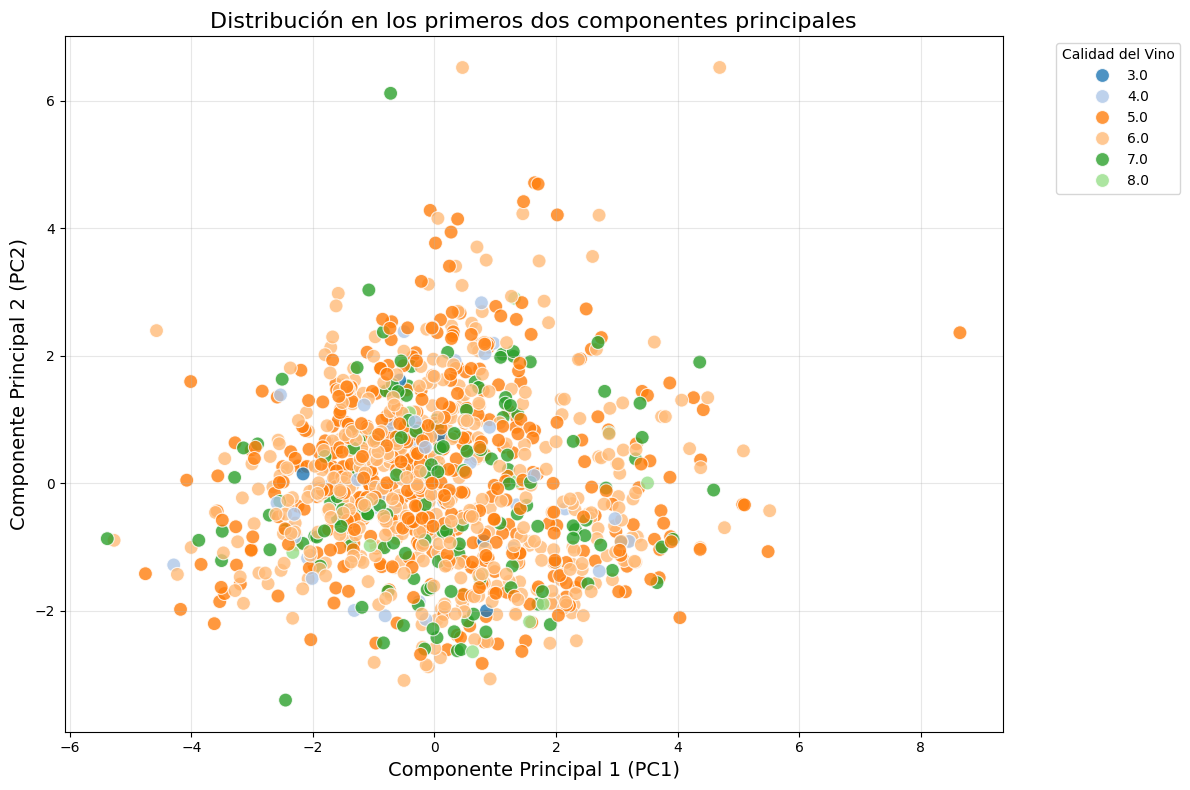

In [23]:
# Proyectar los datos en los dos primeros componentes principales
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['quality'] = y  # Agregar la etiqueta de calidad

# Configurar el gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='quality', palette='tab20', alpha=0.8, s=100)

# Personalizar el gráfico
plt.title('Distribución en los primeros dos componentes principales', fontsize=16)
plt.xlabel('Componente Principal 1 (PC1)', fontsize=14)
plt.ylabel('Componente Principal 2 (PC2)', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Calidad del Vino', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Comparar con T-SNE

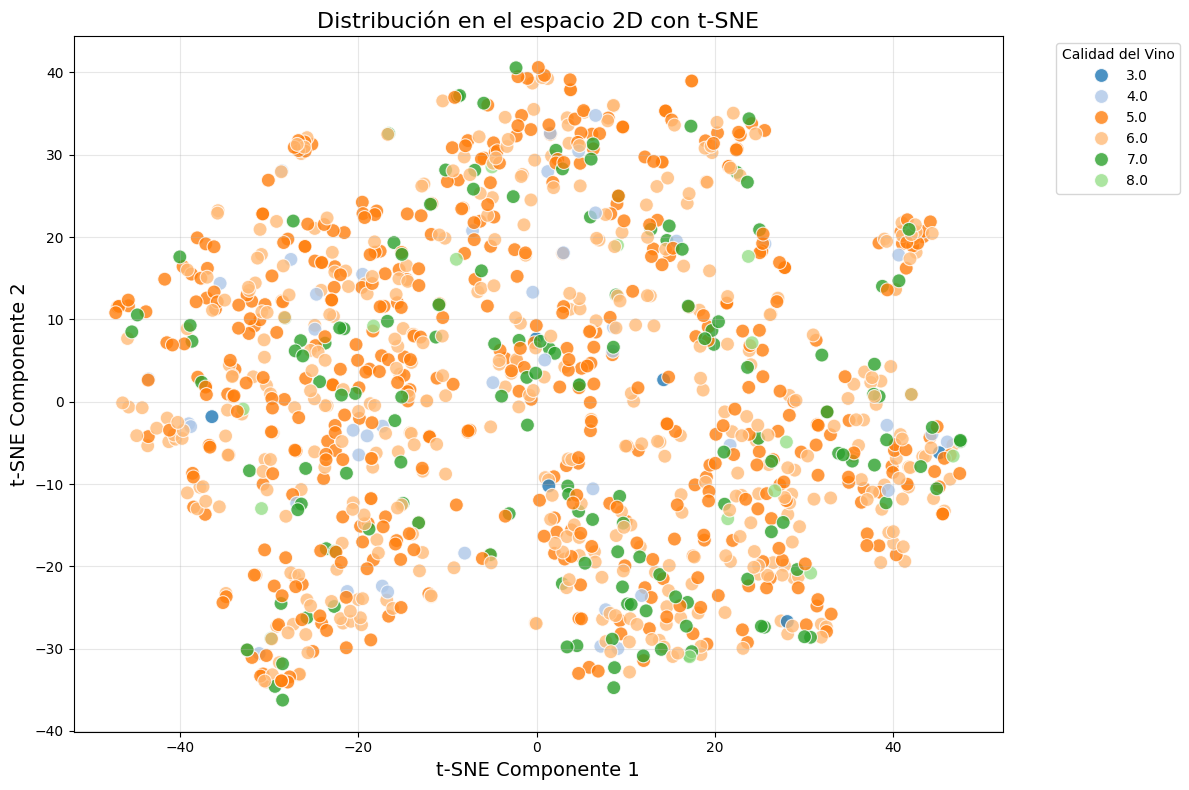

In [24]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)  # X_scaled es el conjunto de datos ya escalado

# Paso 2: Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['quality'] = y  # Agregar la etiqueta de calidad

# Paso 3: Visualizar los resultados de t-SNE
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='quality', palette='tab20', alpha=0.8, s=100)

# Personalizar el gráfico
plt.title('Distribución en el espacio 2D con t-SNE', fontsize=16)
plt.xlabel('t-SNE Componente 1', fontsize=14)
plt.ylabel('t-SNE Componente 2', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Calidad del Vino', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Análisis de Resultados:

  - Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. Discute la importancia de las variables que más contribuyen a los primeros componentes.
  - Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.

Al principio puse un n_components=8 pero chatgpt sugiere que sea n_components=NONE para ver cuantos son los ideales.
El profe taxativamente señalo que se debe indicar una reducción de componentes.

En el ejercicio se vio que son 7 componentes necesarios para obtener el 90% de variabilidad.



| Variables/ Componentes Principales | Coeficientes |      |
|------------------------------------|--------------|------|
|                                    | PC1          | PC2  |
| Fixed acidity                      | 0.49         | 0.11 |
| critic acid                        | 0.46         | 0.16 |
| ph                                 | 0.44         | 0    |
| Total sulfur dioxide               | 0.04         | 0.58 |
| Free sulfur dioxide                | 0            | 0.51 |
| alcohol                            | 0.12         | 0.4  |


Al revisar las variables que tienen un coeficiente mayor a 0.4 en los componentes principales 1 y 2 se ve como los de PC1 tienen coeficientes muy cerca del cero y 1 es cero (ph y Free sulfur dioxide)


Es evidente como el PCA es sumamente util para reducir el espacio de la información y encontrar relaciones mucho más facil para que los modelos de ML se enfoquen en los componentes principales en lugar de que nosotros, se lo definamos más aún con estructuras que pueden ser colosales.
Ese trabajo, lo hace PCA.